# Analise de Compras

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df_vendas1 = pd.read_csv('./dataset_clientes_completo.csv')
df_vendas2 = pd.read_csv('./dataset_clientes_completo_2.csv')


In [26]:
df_vendas1.head()

,nome,idade,cidade,data_nasc,renda_mensal,comprou
0,Bruno,NaN,RJ,15/09/1984,NaN,1
1,NaN,59.0,SC,01/12/1978,5587.73,0
2,Mariane,35.0,MG,24/11/1965,4574.79,0
3,Murilo,70.0,MG,28/01/1989,9305.10,0
4,Emanuelly,NaN,SP,16/08/1984,5721.99,0


In [27]:
df_vendas1.tail()

,nome,idade,cidade,data_nasc,renda_mensal,comprou
995,Pedro Miguel,NaN,MG,20/03/1990,12801.55,1
996,Luiz Gustavo,49.0,NaN,11/08/2006,7965.06,0
997,Maria Cecília,44.0,SP,18/07/1965,8699.10,1
998,Enzo Gabriel,18.0,PR,24/09/1967,NaN,0
999,Davi Lucca,57.0,NaN,16/09/1995,7370.99,0


In [28]:
df_vendas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          970 non-null    object 
 1   idade         904 non-null    float64
 2   cidade        954 non-null    object 
 3   data_nasc     984 non-null    object 
 4   renda_mensal  765 non-null    float64
 5   comprou       1000 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [29]:
df_vendas2.head()

,nome,idade,cidade,data_nasc,renda_mensal,comprou
0,Bárbara,36.0,RJ,28/04/1984,4865.29,1
1,Luiz Fernando,65.0,RJ,01/11/1966,1717.13,1
2,Noah,57.0,RJ,09/03/1985,14725.78,1
3,Diego,58.0,SP,01/10/1973,7915.17,1
4,João Lucas,27.0,SP,08/07/2003,14084.05,0


In [30]:
df_vendas2.tail()

,nome,idade,cidade,data_nasc,renda_mensal,comprou
995,Maria Cecília,27.0,SP,19/06/1983,11010.54,1
996,Fernanda,67.0,BA,02/09/1998,5494.28,1
997,Fernanda,35.0,NaN,31/03/1962,2253.63,0
998,Helena,28.0,RS,29/05/1994,7870.88,1
999,Maria Eduarda,18.0,BA,12/07/1967,10881.54,1


In [31]:
df_vendas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          960 non-null    object 
 1   idade         951 non-null    float64
 2   cidade        900 non-null    object 
 3   data_nasc     992 non-null    object 
 4   renda_mensal  790 non-null    float64
 5   comprou       1000 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [32]:
df = pd.concat([df_vendas1, df_vendas2], ignore_index=True)
df

,nome,idade,cidade,data_nasc,renda_mensal,comprou
0,Bruno,NaN,RJ,15/09/1984,NaN,1
1,NaN,59.0,SC,01/12/1978,5587.73,0
2,Mariane,35.0,MG,24/11/1965,4574.79,0
3,Murilo,70.0,MG,28/01/1989,9305.10,0
4,Emanuelly,NaN,SP,16/08/1984,5721.99,0
...,...,...,...,...,...,...
1995,Maria Cecília,27.0,SP,19/06/1983,11010.54,1
1996,Fernanda,67.0,BA,02/09/1998,5494.28,1
1997,Fernanda,35.0,NaN,31/03/1962,2253.63,0
1998,Helena,28.0,RS,29/05/1994,7870.88,1


# Tratamento de dados

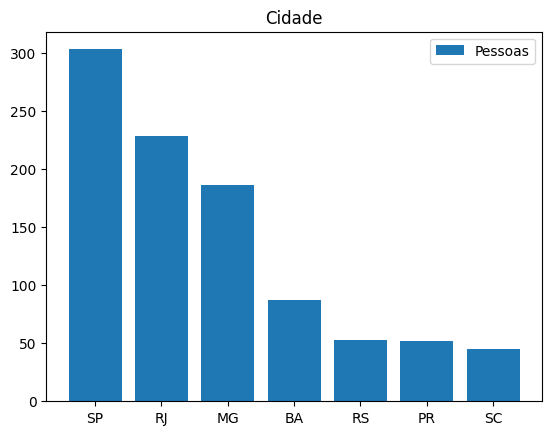

In [33]:
cidade = df_vendas1['cidade'].value_counts()

plt.bar(cidade.index, cidade.values, label='Pessoas')
plt.title('Cidade')
plt.legend()
plt.show()

In [34]:
print(f'Menor renda: {df_vendas1["renda_mensal"].min()}')
print(f'Maior renda: {df_vendas1["renda_mensal"].max()}')
print(f'Renda média: {round(df_vendas1["renda_mensal"].mean(), 2)}')

Menor renda: 1200.49
Maior renda: 14999.37
Renda média: 8048.36


In [35]:
print(f"Mediana renda: {df_vendas1['renda_mensal'].median()}")

Mediana renda: 8127.51


<Axes: xlabel='cidade'>

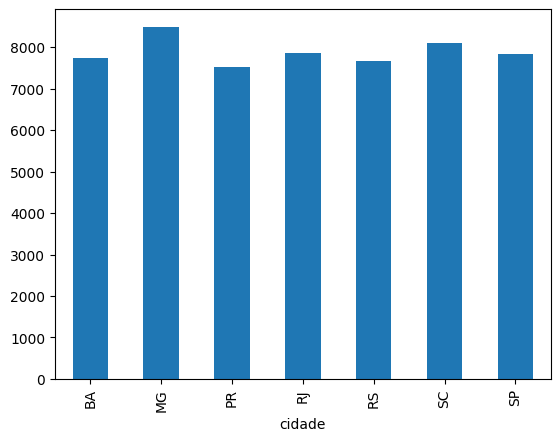

In [36]:
df.groupby('cidade')['renda_mensal'].mean().plot(kind='bar')

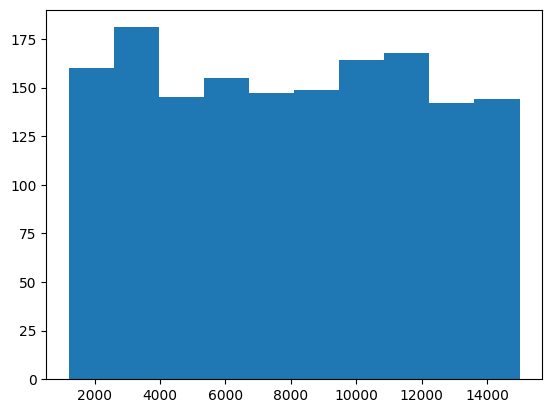

In [37]:
plt.hist(df['renda_mensal'])
plt.show()

<Axes: ylabel='Frequency'>

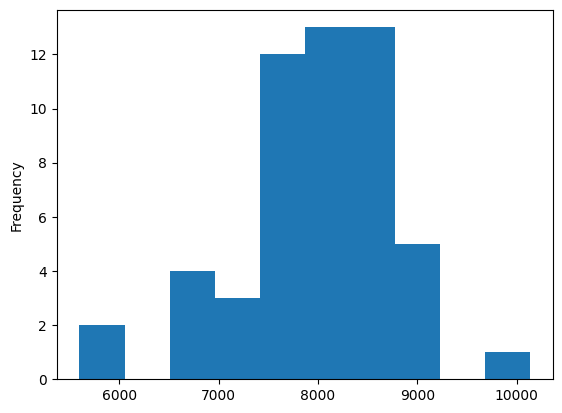

In [38]:
df.groupby('idade')['renda_mensal'].mean().plot(kind='hist')

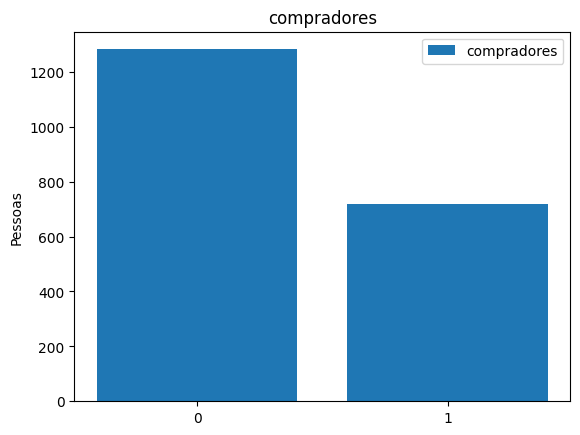

In [39]:
comprou = df['comprou'].value_counts()

plt.bar(comprou.index,comprou.values, label='compradores')
plt.title('compradores')
plt.ylabel('Pessoas')
plt.xticks([0,1])
plt.legend()
plt.show()

In [40]:
df.describe()

,idade,renda_mensal,comprou
count,1855.000000,1555.000000,2000.000000
mean,44.858221,7963.066765,0.359000
std,15.147703,3993.210343,0.479827
min,18.000000,1200.490000,0.000000
25%,32.000000,4475.440000,0.000000
50%,45.000000,8002.910000,0.000000
75%,58.000000,11439.460000,1.000000
max,70.000000,14999.370000,1.000000


In [41]:
# Mudar o nome da coluna

df.rename(columns={'cidade': 'uf'}, inplace=True)

# Excluindo a serie nome

df.drop('nome',axis=1,inplace=True)

# Convertendo datas para datetime

df['nascimento'] = pd.to_datetime(df['data_nasc'], errors='coerce') # caso a data estiver incorreta o errors 'coerce' ira corrigir

df.drop('data_nasc',axis=1,inplace=True)
df

C:\Users\jesie\AppData\Local\Temp\ipykernel_5500\1608947880.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['nascimento'] = pd.to_datetime(df['data_nasc'], errors='coerce') # caso a data estiver incorreta o errors 'coerce' ira corrigir


,idade,uf,renda_mensal,comprou,nascimento
0,NaN,RJ,NaN,1,1984-09-15
1,59.0,SC,5587.73,0,1978-12-01
2,35.0,MG,4574.79,0,1965-11-24
3,70.0,MG,9305.10,0,1989-01-28
4,NaN,SP,5721.99,0,1984-08-16
...,...,...,...,...,...
1995,27.0,SP,11010.54,1,1983-06-19
1996,67.0,BA,5494.28,1,1998-09-02
1997,35.0,NaN,2253.63,0,1962-03-31
1998,28.0,RS,7870.88,1,1994-05-29


In [42]:
df['nascimento'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: nascimento
Non-Null Count  Dtype         
--------------  -----         
1917 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.8 KB


In [43]:
# Excluir os valores nulos da lista nascimento

df.dropna(subset=['nascimento'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1917 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   idade         1780 non-null   float64       
 1   uf            1778 non-null   object        
 2   renda_mensal  1491 non-null   float64       
 3   comprou       1917 non-null   int64         
 4   nascimento    1917 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 89.9+ KB


# Fillna

preencher os valores nulos com a moda de coluna

In [44]:
moda = df['uf'].mode() #definindo a moda que a gente quer

df['uf'].fillna(moda[0], inplace=True) # sempre vem duas modas, coloca o indice 0 para so uma moda

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1917 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   idade         1780 non-null   float64       
 1   uf            1917 non-null   object        
 2   renda_mensal  1491 non-null   float64       
 3   comprou       1917 non-null   int64         
 4   nascimento    1917 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 89.9+ KB


C:\Users\jesie\AppData\Local\Temp\ipykernel_5500\3826556467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['uf'].fillna(moda[0], inplace=True) # sempre vem duas modas, coloca o indice 0 para so uma moda


In [45]:
df['renda_mensal'].fillna(df['renda_mensal'].mean(), inplace=True) # Preeenchendo a coluna renda_mensal com a media, pois os valores estao proximos a media
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1917 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   idade         1780 non-null   float64       
 1   uf            1917 non-null   object        
 2   renda_mensal  1917 non-null   float64       
 3   comprou       1917 non-null   int64         
 4   nascimento    1917 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 89.9+ KB


C:\Users\jesie\AppData\Local\Temp\ipykernel_5500\2338280161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['renda_mensal'].fillna(df['renda_mensal'].mean(), inplace=True) # Preeenchendo a coluna renda_mensal com a media, pois os valores estao proximos a media


# calcular as idades atraves da data de nascimento e preenher

In [46]:
import datetime

In [47]:
hoje = pd.to_datetime('today')

df['calc_idade'] = round((hoje -df['nascimento']).dt.days/365,0)
df

,idade,uf,renda_mensal,comprou,nascimento,calc_idade
0,NaN,RJ,7997.185158,1,1984-09-15,41.0
1,59.0,SC,5587.730000,0,1978-12-01,46.0
2,35.0,MG,4574.790000,0,1965-11-24,60.0
3,70.0,MG,9305.100000,0,1989-01-28,36.0
4,NaN,SP,5721.990000,0,1984-08-16,41.0
...,...,...,...,...,...,...
1995,27.0,SP,11010.540000,1,1983-06-19,42.0
1996,67.0,BA,5494.280000,1,1998-09-02,27.0
1997,35.0,SP,2253.630000,0,1962-03-31,63.0
1998,28.0,RS,7870.880000,1,1994-05-29,31.0
